In [1]:
# Cell 1: Setup
import sys
import os
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

sys.path.append(os.path.abspath(os.path.join('..')))
from src.preprocessing import load_data, clean_data, split_data, get_preprocessor



In [ ]:

df = load_data('../data/raw/insurance.csv')
df = clean_data(df)
X_train, X_test, y_train, y_test = split_data(df)

preprocessor = get_preprocessor()
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_processed, y_train)



,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

: 

: 

In [ ]:
import numpy as np  # <--- This line fixes the error

# We need to extract feature names to make the plot readable
# Note: The order depends on your pipeline definition in src/preprocessing.py
num_features = ['age', 'bmi', 'children']

# Get the one-hot encoded feature names from the 'cat' transformer
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(['sex', 'smoker', 'region'])

# Combine them
feature_names = np.concatenate([num_features, cat_features])

print("✅ Feature names extracted successfully!")
print(feature_names)


✅ Feature names extracted successfully!
['age' 'bmi' 'children' 'sex_male' 'smoker_yes' 'region_northwest'
 'region_southeast' 'region_southwest']


: 

: 

✅ Features found: ['age' 'bmi' 'children' 'sex_male' 'smoker_yes' 'region_northwest'
 'region_southeast' 'region_southwest']


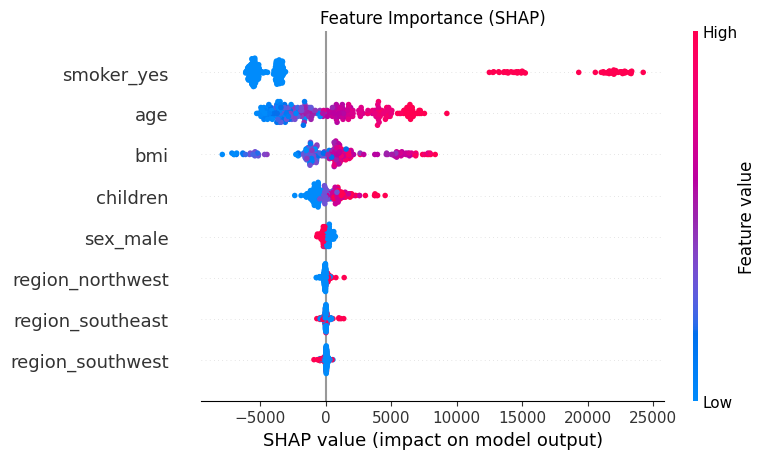

: 

: 

In [ ]:
# 1. Imports (Safety Check)
import numpy as np
import shap
import matplotlib.pyplot as plt

# 2. Re-create the feature names (Guarantees they exist)
num_features = ['age', 'bmi', 'children']
# Get the categorical names from the preprocessor we trained earlier
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(['sex', 'smoker', 'region'])
feature_names = np.concatenate([num_features, cat_features])

print(f"✅ Features found: {feature_names}")

# 3. Calculate SHAP Values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_processed)

# 4. Generate the Plot
plt.title('Feature Importance (SHAP)')
# We use X_test_processed to match the shape of shap_values
shap.summary_plot(shap_values, X_test_processed, feature_names=feature_names)

✅ Extracted 8 features: ['age' 'bmi' 'children' 'sex_male' 'smoker_yes' 'region_northwest'
 'region_southeast' 'region_southwest']


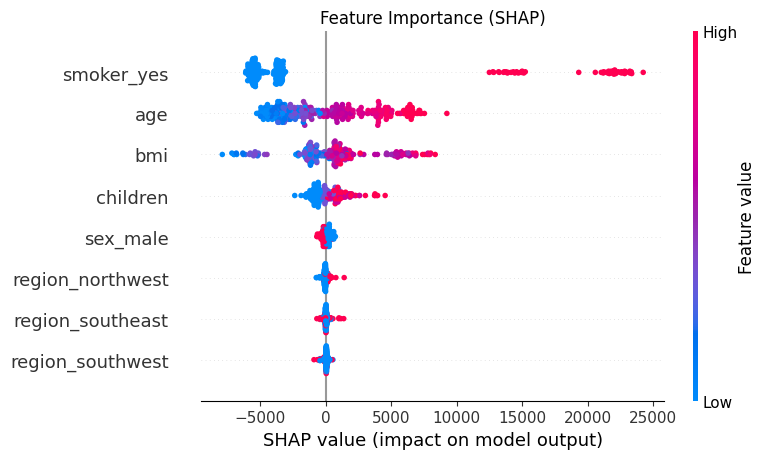

: 

: 

In [ ]:
import numpy as np
import shap
import matplotlib.pyplot as plt

# 1. Re-Define Feature Names (So the error disappears)
num_features = ['age', 'bmi', 'children']
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(['sex', 'smoker', 'region'])
feature_names = np.concatenate([num_features, cat_features])

print(f"✅ Extracted {len(feature_names)} features: {feature_names}")

# 2. Calculate SHAP Values
# (This explains why the model made its decisions)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_processed)

# 3. Plot the "Summary Plot"
plt.title('Feature Importance (SHAP)')
shap.summary_plot(shap_values, X_test_processed, feature_names=feature_names)